In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import seaborn as sns

In [38]:
df = pd.read_csv('econ_fares.csv')

In [18]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309,low_cost
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309,low_cost
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309,low_cost


In [23]:
# df = df.drop(['id','lati_source_city', 'long_source_city', 'lati_destination', 'long_destination'], axis=1)

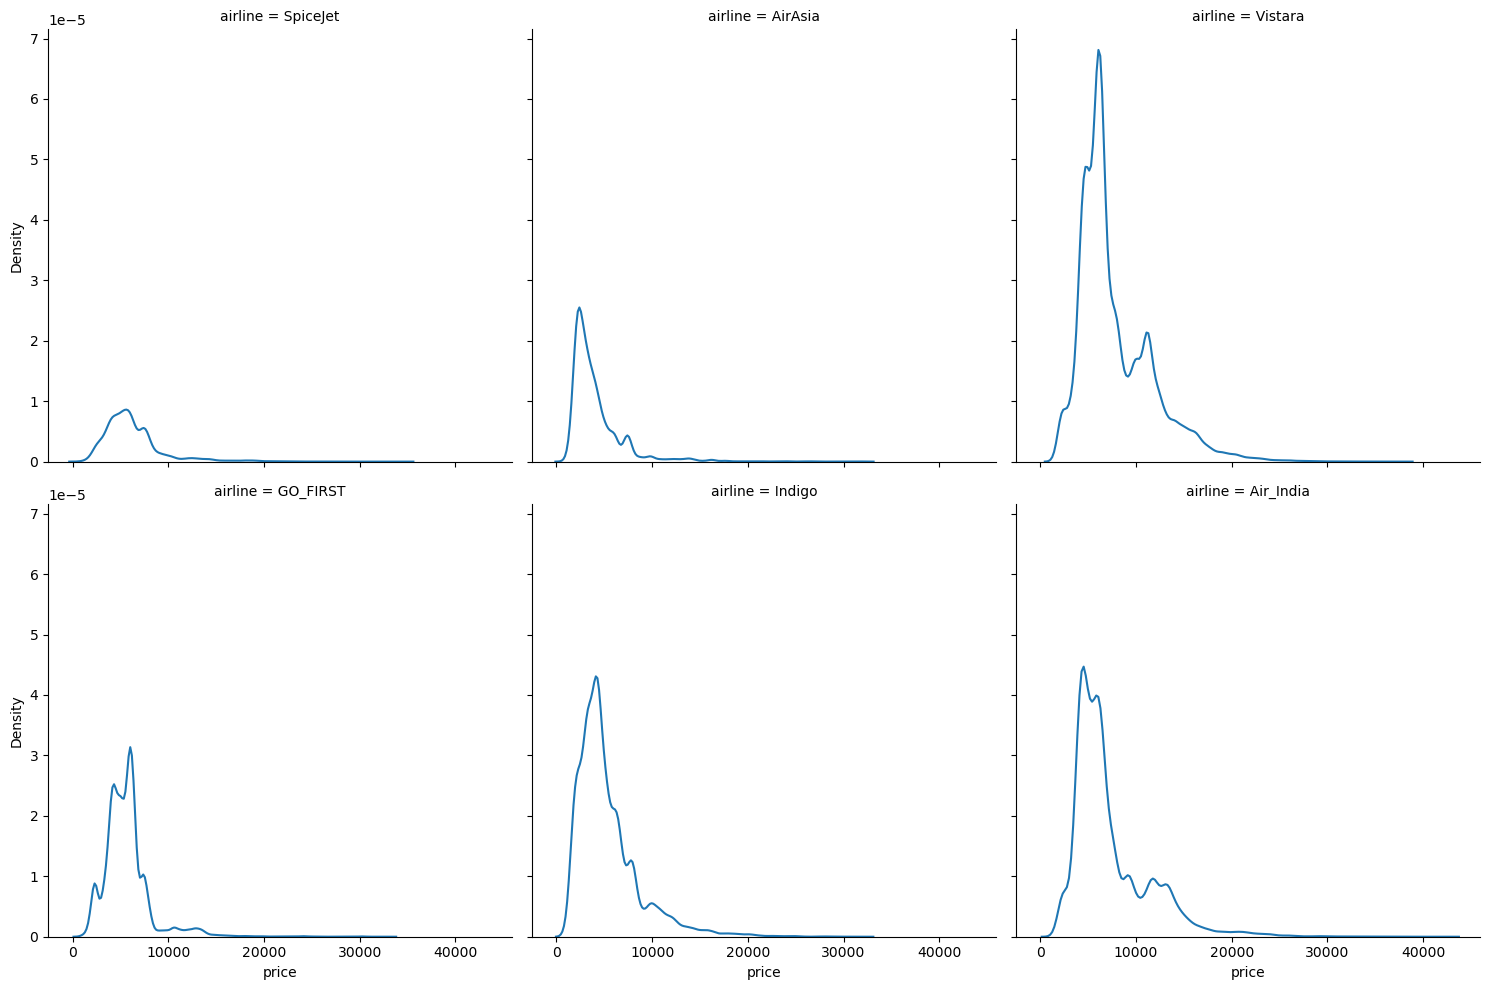

In [12]:
sns.displot(data=df, kind='kde', x='price', col='airline', col_wrap=3)

In [13]:
df['carrier_category'] = df['airline'].apply(lambda x: 'full_service' if x in ['Vistara', 'Air India'] else 'low_cost')

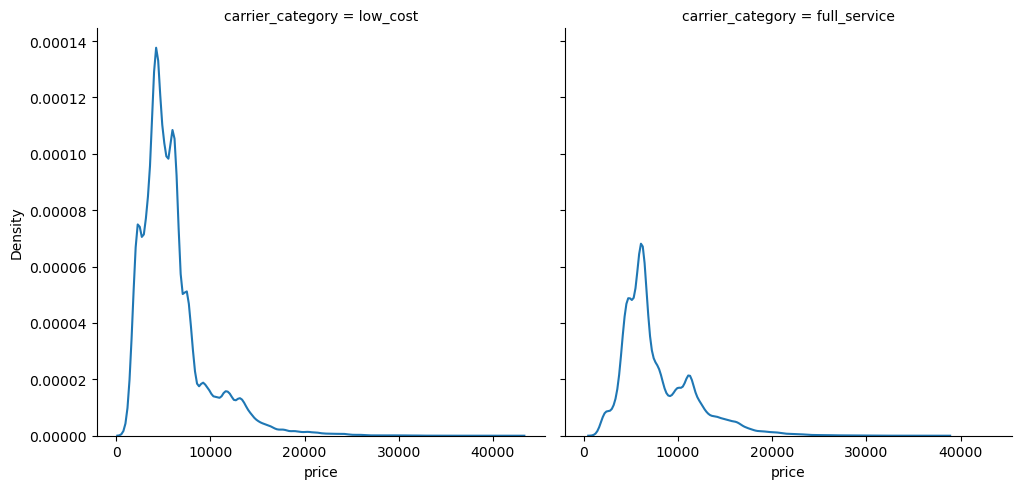

In [14]:
sns.displot(data=df, kind='kde', x='price', col='carrier_category', col_wrap=3)

In [26]:
# df.to_csv('price.csv', index=False)

In [27]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309


In [32]:
df['des_GDP'] = df['des_GDP'].apply(lambda x: str(x).replace(',',''))
df['des_GDP'] = df['des_GDP'].astype('float')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   airline                   300153 non-null  object 
 1   source_city               300153 non-null  object 
 2   departure_time            300153 non-null  object 
 3   stops                     300153 non-null  object 
 4   arrival_time              300153 non-null  object 
 5   destination_city          300153 non-null  object 
 6   distance                  300153 non-null  float64
 7   class                     300153 non-null  object 
 8   duration                  300153 non-null  float64
 9   days_left                 300153 non-null  int64  
 10  price                     300153 non-null  int64  
 11  origin_airport_capacity   300153 non-null  int64  
 12  arrival_airport_capacity  300153 non-null  int64  
 13  origin_GDP                300153 non-null  i

In [15]:
# df.to_csv('econ_fares.csv', index=False)

<AxesSubplot:>

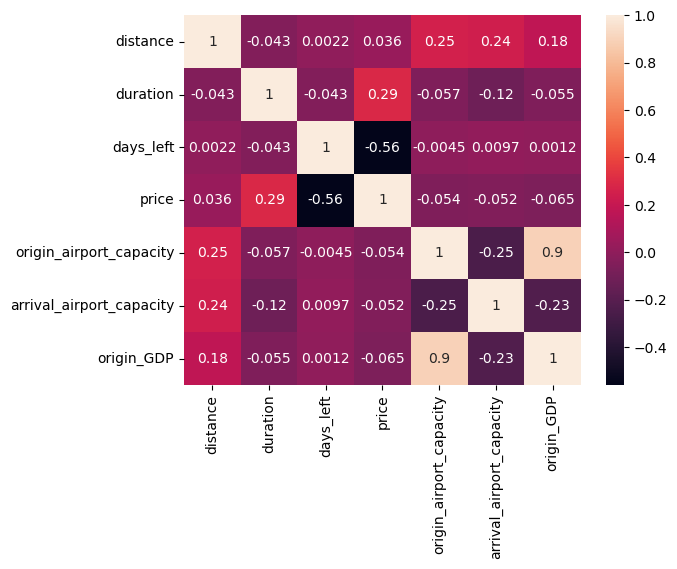

In [19]:
# corrplot

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

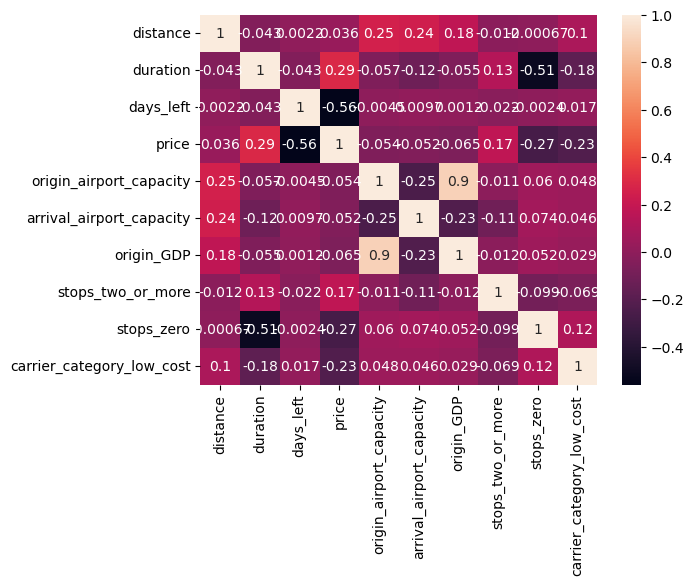

In [24]:
# half the heatmap
sns.heatmap(pd.get_dummies(df, columns=['stops', 'carrier_category'], drop_first=True).corr(), annot=True)



In [22]:
# only get dummies for stops column in df

pd.get_dummies(df, columns=['stops'], drop_first=True)


,airline,source_city,departure_time,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,stops_two_or_more,stops_zero
0,SpiceJet,New Delhi,Evening,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309,low_cost,0,1
1,SpiceJet,New Delhi,Early_Morning,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309,low_cost,0,1
2,AirAsia,New Delhi,Early_Morning,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309,low_cost,0,1
3,Vistara,New Delhi,Morning,Afternoon,Mumbai,1160.540574,Economy,2.25,1,5955,39339998,21747892,598922,224309,full_service,0,1
4,Vistara,New Delhi,Morning,Morning,Mumbai,1160.540574,Economy,2.33,1,5955,39339998,21747892,598922,224309,full_service,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,Chennai,Early_Morning,Night,Hyderabad,511.375514,Economy,13.83,49,7697,9533301,12429796,241130,305389,full_service,0,0
206662,Vistara,Chennai,Early_Morning,Night,Hyderabad,511.375514,Economy,13.83,49,7709,9533301,12429796,241130,305389,full_service,0,0
206663,Vistara,Chennai,Afternoon,Morning,Hyderabad,511.375514,Economy,20.58,49,8640,9533301,12429796,241130,305389,full_service,0,0
206664,Vistara,Chennai,Morning,Morning,Hyderabad,511.375514,Economy,23.33,49,8640,9533301,12429796,241130,305389,full_service,0,0


In [29]:
df['od_pair'] = df['source_city'].astype(str) + '-' + df['destination_city'].astype(str)

In [30]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai


In [32]:
df.isnull().sum()

airline                     0
source_city                 0
departure_time              0
stops                       0
arrival_time                0
destination_city            0
distance                    0
class                       0
duration                    0
days_left                   0
price                       0
origin_airport_capacity     0
arrival_airport_capacity    0
origin_GDP                  0
des_GDP                     0
carrier_category            0
od_pair                     0
dtype: int64

In [34]:
df = df[df['stops'] == 'zero']

In [37]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai


In [36]:
df.to_csv('econ_fares.csv', index=False)